## Problem 1 -- Tradeoffs and Regularization

A hobbyist pilot is planning her next flight. She is concerned about minimizing fuel usage so she can fly as long as possible. The flight plan includes numerous altitude changes. Each increase or decrease of 1 foot of altitude consumes 0.05 gallons of fuel. There are 100 discrete points where the pilot will need to change altitude. The desired altitudes are shown in the graph produced by the code snippet below.

Abrupt changes in altitude are risky and could potentially cause a loss of control of the aircraft, potentially inducing a stall or even resulting in structural damage. The pilot would like to find an alternative sequence of altitudes that gives her a tradeoff between matching the desired altitudes in the graph below and smoother transitions between successive altitudes. Denote the aircraft's altitude at each discrete time by $u_1,u_2,...,u_{100}$. We can characterize smoothness by using the sum of the squared differences between each successive altitude:

$$R(u) = (u_2-u_1)^2 + (u_3-u_2)^2 + \dotsm + (u_{100}-u_{99})^2$$

Of course, the smaller we make $R(u)$ the smoother the transitions will be. Find a set of optimal sequences of altitudes that explores the tradeoff between matching the desired seuqence given in the graph below and keeping the transitions smooth.  Include a plot comparing the desired altitudes to at least 4 different smoothed versions. Use regularization weights of 0.1, 1, 10, and at least one other weight of your choice. Also plot your solutions on a Pareto curve. Either graph a curve or describe in a few words what you think the Pareto curve would look like if you filled in all the points. 

Use the code provided below to generate data for your model.

In [181]:
using Random

seed = 787439
Random.seed!(seed)
# initialize the vector of altitudes
val = 0; u = zeros(100); u[1] = val
# set a density that determines how often the speed changes
# low density corresponds to infrequent speed changes
dens = 0.3
# build speed vector for all times between now and time 99
for i in 2:99
    # if a uniform(0,1) variable is < density
    if rand() < dens
        # increase the altitude
        val = val + 1
        u[i] = val
        # if a uniform(0,1) variable is >= 1 - density
    elseif rand() >= 1.0-dens
        # decrease the altitude
        val = val - 1
        u[i] = val
    else# otherwise the altitude stays the same
        u[i] = val
    end
end
# the final altitude must be 0
u[100] = 0
T = length(u);


In [183]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer) 
@variable(m, x[1:100])
@constraint(m, x[1] == 0)
@constraint(m, x[100] == 0)


rx = sum((x[i+1]-x[i])^2 for i in 1:99) 
    

@objective(m, Min, sum((x-u).^2) + 0.1*rx)
        
optimize!(m)

xopt1 = value.(x)

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      199

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.7200000e+02 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

100-element Vector{Float64}:
  0.0
  0.07688174706144034
  0.922580964737284
  0.9940898297859663
  1.006496992694311
  1.0838740825457653
  1.9999919978548724
  2.916029891712701
  2.992366702697541
  2.992370540657786
  2.9160797851958873
  2.0005868816928585
  1.0909627951184129
  ⋮
  1.9219898965637268
  1.910123855083526
  0.9994963644385836
  0.0838325181794761
  0.006493853715129446
 -0.005906273597922751
 -0.07736913689020246
 -0.9225233690845066
 -0.9929112921238759
 -0.9924121364020034
 -0.9160343447001669
  3.0814879110195774e-33

In [184]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer) 
@variable(m, x[1:100])
@constraint(m, x[1] == 0)
@constraint(m, x[100] == 0)


rx = sum((x[i+1]-x[i])^2 for i in 1:99) 
    

@objective(m, Min, sum((x-u).^2) + 1*rx)
        
optimize!(m)

xopt2 = value.(x) 

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      199

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.7200000e+02 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

100-element Vector{Float64}:
  0.0
  0.24295909717680983
  0.7288772915304295
  0.9436727774144785
  1.102141040713006
  1.362750344724539
  1.9861099934606108
  2.595579635657294
  2.8006289135112707
  2.8063071048765176
  2.6182924011182824
  2.0485700984783293
  1.527417894316706
  ⋮
  1.6720886442788274
  1.546647827821482
  0.9678548391856187
  0.3569166897353737
  0.10289523002050242
 -0.048230999673866445
 -0.24758822904210176
 -0.6945336874524388
 -0.8360128333152148
 -0.8135048124932056
 -0.6045016041644019
  0.0

In [185]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer) 
@variable(m, x[1:100])
@constraint(m, x[1] == 0)
@constraint(m, x[100] == 0)


rx = sum((x[i+1]-x[i])^2 for i in 1:99) 
    

@objective(m, Min, sum((x-u).^2) + 10*rx)
        
optimize!(m)

xopt3 = value.(x) 

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      199

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.7200000e+02 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

100-element Vector{Float64}:
  0.0
  0.2837358268714666
  0.5958452364300798
  0.867539169631701
  1.125987019796492
  1.3970335719409326
  1.7077834812794663
  1.989311738745947
  2.169771170087022
  2.2672077184368
  2.291365038630257
  2.2446588626867405
  2.2224185730118973
  ⋮
  1.2226340546368002
  1.0673304603297669
  0.8187599120557104
  0.5520653549872248
  0.34057733341746155
  0.16314704518944445
  0.002031461480371825
 -0.15888097608066362
 -0.2356815112497654
 -0.2360501975438438
 -0.16002390359230656
  0.0

In [186]:
using JuMP, Ipopt
m = Model(Ipopt.Optimizer) 
@variable(m, x[1:100])
@constraint(m, x[1] == 0)
@constraint(m, x[100] == 0)


rx = sum((x[i+1]-x[i])^2 for i in 1:99) 
    

@objective(m, Min, sum((x-u).^2) + 50*rx)
        
optimize!(m)

xopt4 = value.(x) 

This is Ipopt version 3.14.13, running with linear solver MUMPS 5.6.0.

Number of nonzeros in equality constraint Jacobian...:        2
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      199

Total number of variables............................:      100
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  7.7200000e+02 0.00e+00 1.20e+01  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

100-element Vector{Float64}:
 0.0
 0.23355068315062502
 0.4717723799642625
 0.6994295243771853
 0.9210752592776518
 1.1411424993636712
 1.364032589436964
 1.574203331298996
 1.755858139787008
 1.9126301110707604
 2.047654684575928
 2.1636323517726144
 2.2828826660047525
 ⋮
 0.9247994358478151
 0.8264912040307866
 0.7047127962943737
 0.5770286444838483
 0.4608850655629999
 0.35395918795341164
 0.25411249410289155
 0.15934805013442935
 0.08777056716865572
 0.03794849554625522
 0.008885393834779811
 0.0

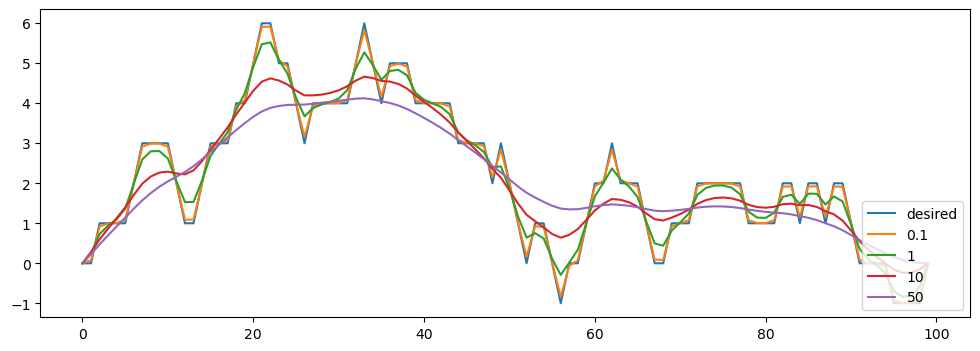

In [188]:
using PyPlot
figure(figsize=(12,4))
plot(u, "-")
plot(xopt1) 
plot(xopt2) 
plot(xopt3) 
plot(xopt4)
legend(["desired", "0.1", "1", "10", "50"], loc="lower right");

A pareto curve displays the relationship between the sum of squared differences (of the desired altitude and the true altitude) and the smoothness of the curve for each weight. As smoothness increases, the values the least-square for that point increase, which would be indicative of a pareto curve similar to a negative logarithmic curve

## Problem 2 -- Plotting Polynomials

While out on a hike one day, you stumble upon a mysterious looking map with 20 "x" marks scattered all over. On the back of the map is a note:

"As you hunt for the buried treasure, you should use the markings on this map as your guide. The final location you visit will require you to enter a series of numerical codes to open the treasure chest. The codes are the optimal coefficients of a polynomial function of the form $y = a_1x^3 + a_2x^2 + a_3x + a_4$. How do you know you've found the optimal function? It will be the one that most closely fits the data shown on this treasure map!"

What values of $a$ give the best match between your polynomial model and the given data? 

You can use the following code snippet to initialize your model and view the given data points.

In [94]:
k = 3

m = length(x)
A = zeros(m,k+1)

for i = 1:m
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

aopt = inv(A'*A)*(A'*y)

4-element Vector{Float64}:
 -0.0008192486324655628
  0.13877025233884938
 -6.597287159133593
 77.11019923302516

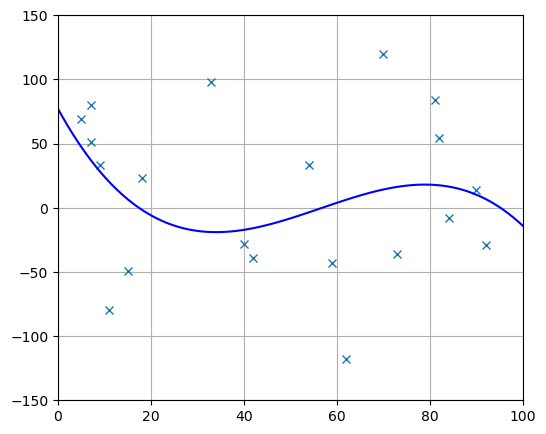

In [25]:
#plot against original graph to check
using PyPlot

npts = 100
x_poly = range(0,stop=100,length=npts)
y_poly = zeros(npts)

for j = 1:npts
    y_poly[j] = aopt[1] * x_poly[j]^3 + aopt[2] * x_poly[j]^2 + aopt[3] * x_poly[j] + aopt[4]
end

figure(figsize=(6,5))
plot( x, y, "x")
plot( x_poly, y_poly, "b-")
axis([0,100,-150,150])
grid()